In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\MUJ HACKX 2.0\SA_Dataset.csv")

In [3]:
data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.shape

(31015, 4)

In [5]:
# Select the used columns

data = data[['text','sentiment']]
print(data.head())

                                                text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative


# Data Cleaning

In [7]:
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
# Convert 'text' and 'sentiment' columns to lowercase
data['text'] = data['text'].str.lower()
data['sentiment'] = data['sentiment'].str.lower()

print(data[['text', 'sentiment']].head())


                                                text sentiment
0                i`d have responded, if i were going   neutral
1      sooo sad i will miss you here in san diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   sons of ****, why couldn`t they put them on t...  negative


In [9]:
data.shape

(31015, 2)

In [10]:
data['sentiment'].isnull().sum()

0

In [11]:
data['text'].isnull().sum()

1

In [12]:
data = data.dropna(subset=['text'])
print(data.head())

                                                text sentiment
0                i`d have responded, if i were going   neutral
1      sooo sad i will miss you here in san diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   sons of ****, why couldn`t they put them on t...  negative


In [13]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [14]:
type(data['text'])

pandas.core.series.Series

In [15]:
type(data['sentiment'])

pandas.core.series.Series

# Data Preparation

## 1. Text Preprocessing

### 1. Remove HTML Tags

In [19]:
import re

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub('',text)

In [20]:
data['text'] = data['text'].apply(remove_html_tags)
print(data['text'].head())

0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### 2. Remove URL

In [22]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www.\.\S+')
    return pattern.sub(r'',text)

In [23]:
data['text'] = data['text'].apply(remove_url)
print(data['text'].head())

0                  i`d have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     sons of ****, why couldn`t they put them on t...
Name: text, dtype: object


### 3. Remove Punctuation

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [27]:
data['text'] = data['text'].apply(remove_punctuation)
print(data['text'].head())

0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldnt they put them on the rel...
Name: text, dtype: object


## Tokenization

In [29]:
from nltk.tokenize import word_tokenize
import nltk

In [30]:
def tokenize_text(text):
    return word_tokenize(text)

In [31]:
data['tokens'] = data['text'].apply(tokenize_text)
data['tokens'].head()

0            [id, have, responded, if, i, were, going]
1    [sooo, sad, i, will, miss, you, here, in, san,...
2                         [my, boss, is, bullying, me]
3                  [what, interview, leave, me, alone]
4    [sons, of, why, couldnt, they, put, them, on, ...
Name: tokens, dtype: object

## Stemming

In [33]:
from nltk.stem import PorterStemmer
import nltk

In [34]:
stemmer = PorterStemmer()

In [35]:
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

In [36]:
data['stemmed_tokens'] = data['tokens'].apply(stem_tokens)
data['stemmed_tokens'].head()

0                 [id, have, respond, if, i, were, go]
1    [sooo, sad, i, will, miss, you, here, in, san,...
2                            [my, boss, is, bulli, me]
3                    [what, interview, leav, me, alon]
4    [son, of, whi, couldnt, they, put, them, on, t...
Name: stemmed_tokens, dtype: object

## Lemmatization

In [38]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [39]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
lemmatizer = WordNetLemmatizer()

In [41]:
def get_wordnet_pos(treebank_tag):
    """Converts treebank tag to wordnet tag."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [42]:
def lemmatize_tokens(tokens):
    pos_tags = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]

In [43]:
data['lemmatized_tokens'] = data['tokens'].apply(lemmatize_tokens)

In [44]:
data['lemmatized_tokens'].head()

0                   [id, have, respond, if, i, be, go]
1    [sooo, sad, i, will, miss, you, here, in, san,...
2                             [my, bos, be, bully, me]
3                  [what, interview, leave, me, alone]
4    [son, of, why, couldnt, they, put, them, on, t...
Name: lemmatized_tokens, dtype: object

## Bag of Words (BoW)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vectorizer = CountVectorizer()

In [48]:
X_bow = vectorizer.fit_transform(data['text'])

In [49]:
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df.head())

   00  000  0003  007  01  010  01xx  024  03  04  ...  ½tition  ½ureo  ½ve  \
0   0    0     0    0   0    0     0    0   0   0  ...        0      0    0   
1   0    0     0    0   0    0     0    0   0   0  ...        0      0    0   
2   0    0     0    0   0    0     0    0   0   0  ...        0      0    0   
3   0    0     0    0   0    0     0    0   0   0  ...        0      0    0   
4   0    0     0    0   0    0     0    0   0   0  ...        0      0    0   

   ½we  ½why  ½whyyy  ½y  ½you  ½z  ½ï  
0    0     0       0   0     0   0   0  
1    0     0       0   0     0   0   0  
2    0     0       0   0     0   0   0  
3    0     0       0   0     0   0   0  
4    0     0       0   0     0   0   0  

[5 rows x 30142 columns]


## Vector Representation

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf_vectorizer = TfidfVectorizer()

In [53]:
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

In [54]:
print(X_tfidf.shape)

(31014, 30142)


In [55]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

In [56]:
from scipy.sparse import save_npz, load_npz
save_npz('tfidf_matrix.npz', X_tfidf)
X_tfidf_loaded = load_npz('tfidf_matrix.npz')

In [57]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000)  # Reduce to 1000 dimensions
X_tfidf_reduced = svd.fit_transform(X_tfidf)

In [58]:
X_tfidf_reduced

array([[ 8.16343711e-02, -1.86730615e-02,  1.43304077e-02, ...,
         1.64755576e-03,  1.18796733e-03, -3.47955871e-03],
       [ 1.17385952e-01, -2.40430178e-02,  1.49585118e-01, ...,
        -7.72604702e-03,  1.65525049e-02, -6.86265775e-03],
       [ 1.53720541e-01, -4.99253170e-02, -6.73892486e-02, ...,
         1.48757454e-02, -2.61261335e-02,  9.37047401e-02],
       ...,
       [ 1.33851566e-01, -2.42208047e-02,  6.09659763e-02, ...,
        -1.45054274e-03, -2.13887482e-03,  3.73564137e-03],
       [ 1.34683798e-01, -1.12629452e-02,  4.12752259e-02, ...,
        -2.08681541e-02,  3.43887416e-02, -2.65688966e-02],
       [ 3.89392190e-03,  6.50062985e-05,  2.36417519e-03, ...,
         5.93070378e-03, -1.43811702e-02, -2.04064388e-02]])

## 2. Splitting Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = X_tfidf

In [62]:
y = data['sentiment']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Model Training

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [66]:
classifier = LogisticRegression(max_iter=1000)

In [67]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6979368149580916
              precision    recall  f1-score   support

    negative       0.75      0.59      0.66       862
     neutral       0.63      0.77      0.69      1268
    positive       0.79      0.70      0.74       972

    accuracy                           0.70      3102
   macro avg       0.72      0.69      0.70      3102
weighted avg       0.71      0.70      0.70      3102



## Evaluate Model

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


[[510 315  37]
 [145 977 146]
 [ 24 270 678]]
              precision    recall  f1-score   support

    negative       0.75      0.59      0.66       862
     neutral       0.63      0.77      0.69      1268
    positive       0.79      0.70      0.74       972

    accuracy                           0.70      3102
   macro avg       0.72      0.69      0.70      3102
weighted avg       0.71      0.70      0.70      3102



# Sample Output

In [73]:
sample_text = ["Simple and straight to the point, "]

In [74]:
# Preprocess the sample text (same as training data)
sample_text_tfidf = tfidf_vectorizer.transform(sample_text)


In [75]:
# Predict sentiment
predicted_sentiment = classifier.predict(sample_text_tfidf)

In [76]:
# Output the result
print(f"The sentiment of the sample text is: {predicted_sentiment[0]}")

The sentiment of the sample text is: neutral


# Pickle

In [79]:
import pickle

In [80]:
# Save the trained model using pickle
pickle.dump(classifier, open('classifier.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

In [81]:
# Load the model and vectorizer using pickle
classifier = pickle.load(open('classifier.pkl', 'rb'))
tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

In [82]:
# Sample text for checking
sample_texts = ["I had an amazing day today!"]

In [83]:
# Preprocess the sample text (same as training data)
sample_texts_tfidf = tfidf_vectorizer.transform(sample_texts)

In [84]:
# Predict sentiment
predicted_sentiments = classifier.predict(sample_texts_tfidf)

In [85]:
# Output the result
print(f"The sentiment of the sample text is: {predicted_sentiments[0]}")

The sentiment of the sample text is: positive


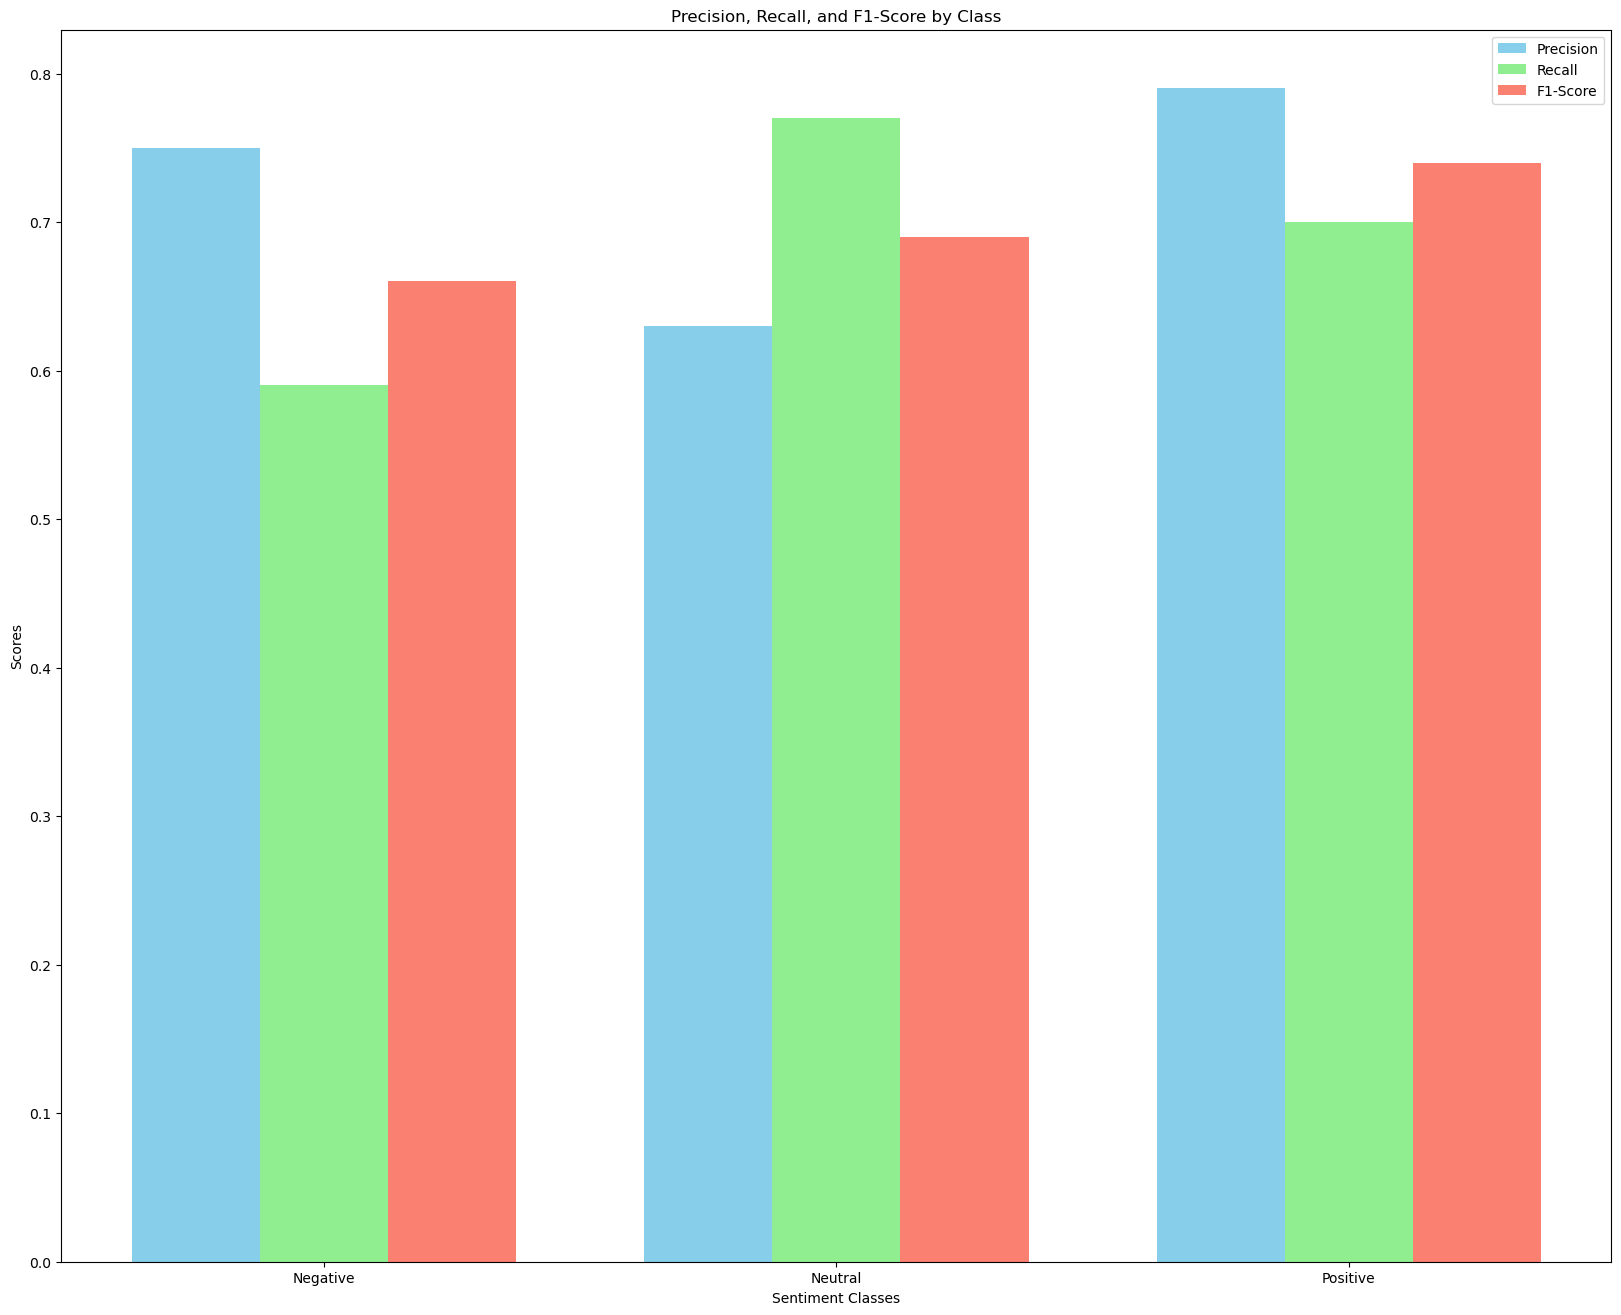

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for metrics
classes = ['Negative', 'Neutral', 'Positive']
precision = [0.75, 0.63, 0.79]
recall = [0.59, 0.77, 0.70]
f1_score = [0.66, 0.69, 0.74]

# Bar width and positions
bar_width = 0.25
x = np.arange(len(classes))

# Plot bars
plt.figure(figsize=(20, 16))
plt.bar(x - bar_width, precision, bar_width, label='Precision', color='skyblue')
plt.bar(x, recall, bar_width, label='Recall', color='lightgreen')
plt.bar(x + bar_width, f1_score, bar_width, label='F1-Score', color='salmon')

# Add labels and title
plt.xlabel('Sentiment Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x, classes)
plt.legend()

plt.savefig('average_metrics_bar_chart.png', dpi=300, bbox_inches='tight')

plt.show()


In [87]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\dell\anaconda3\lib\site-packages (1.9.3)




[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


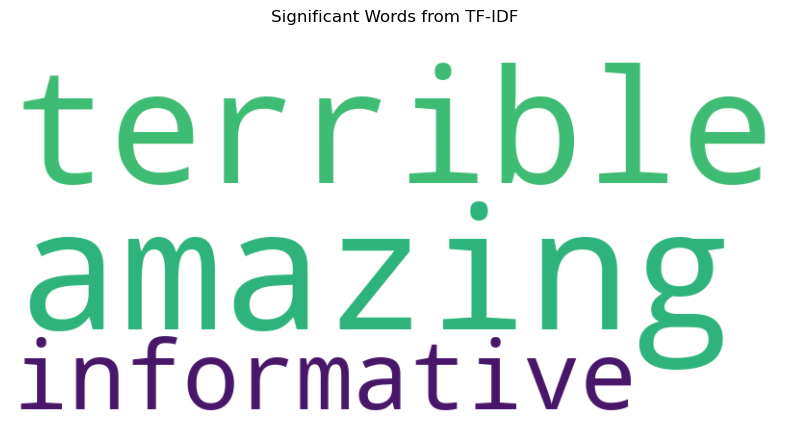

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample TF-IDF data
tfidf_data = {'amazing': 0.08, 'terrible': 0.07, 'informative': 0.06}  # Replace with actual TF-IDF data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_data)

# Display and save the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Significant Words from TF-IDF')

# Save the word cloud
wordcloud.to_file('tfidf_word_cloud.png')
plt.show()


In [89]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


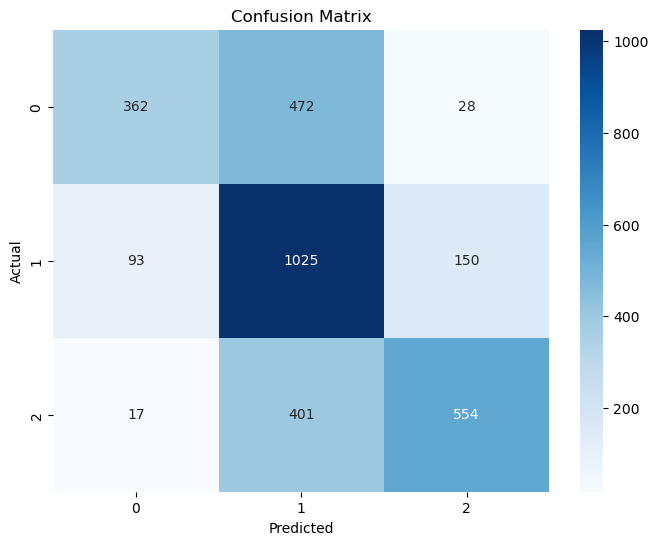

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Example classifier

# Assuming X and y are defined earlier in your code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the heatmap
plt.savefig('confusion_matrix_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


In [91]:
pip install diagrams


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Dell\AppData\Local\Temp\ipykernel_15212\1248048155.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='sentiment', y='word_count', palette='Set2')


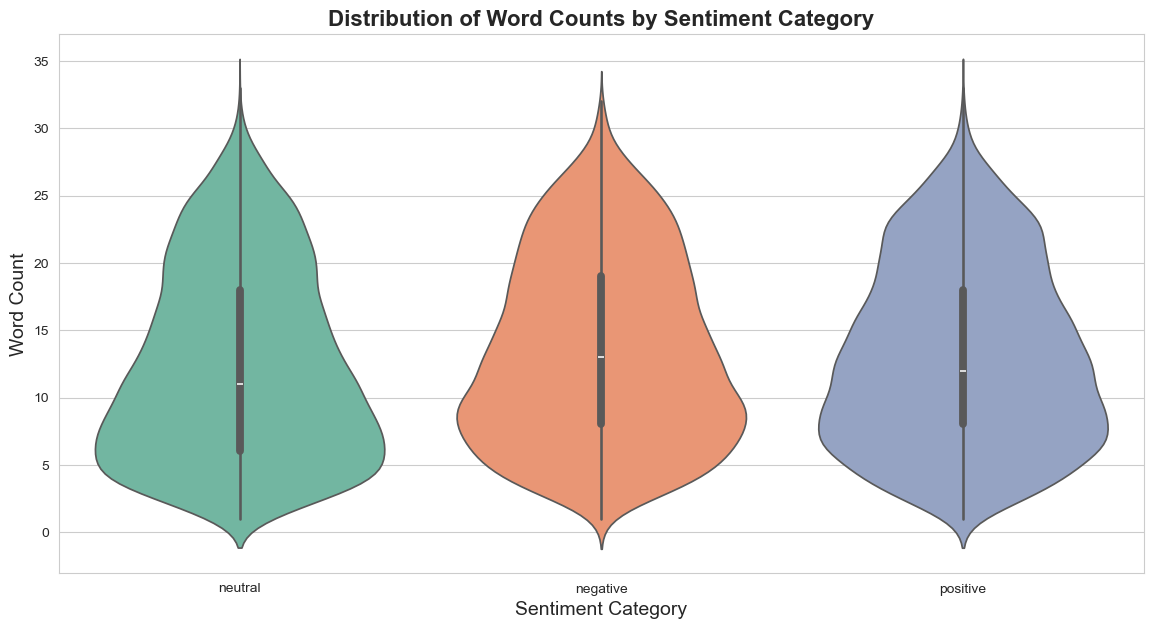

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace the path with your file's location)
data = pd.read_csv(r"C:\Users\Dell\Desktop\MUJ HACKX 2.0\SA_Dataset.csv")

# Select the relevant columns
data = data[['text', 'sentiment']]

# Create a new column for word count
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# Set up the figure size and Seaborn style
plt.figure(figsize=(14, 7))
sns.set_style('whitegrid')

# Draw the violin plot
sns.violinplot(data=data, x='sentiment', y='word_count', palette='Set2')

# Add titles and labels
plt.title('Distribution of Word Counts by Sentiment Category', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Word Count', fontsize=14)

# Save the violin plot as an image file
plt.savefig('violin_plot_word_count.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


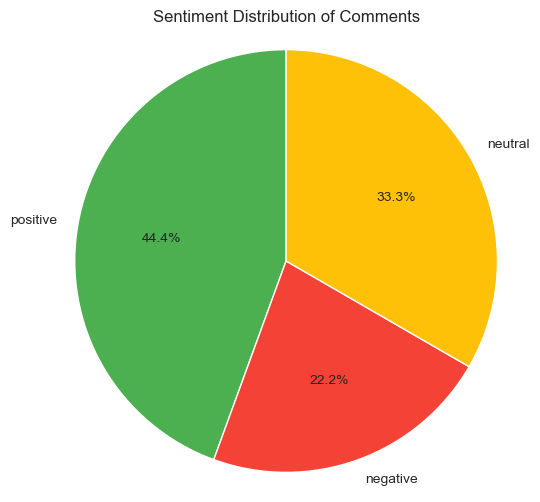

In [173]:
import matplotlib.pyplot as plt

# Sample dataset
sentiments = ['positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'neutral', 'positive']

# Count the sentiments
sentiment_counts = {'positive': sentiments.count('positive'),
                    'negative': sentiments.count('negative'),
                    'neutral': sentiments.count('neutral')}

# Data for the pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution of Comments')
plt.axis('equal')
plt.savefig('sentiment_pie_chart.png') # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
